# Imports


In [183]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [184]:
with MPRester("OagdrlTwLXSmV3tf") as m:
    
    # Structure for material id
    struct = m.get_structure_by_material_id("mp-1023924")
    
    # Bandstructure for material id
    bs = m.get_bandstructure_by_material_id("mp-1023924")

# Graphe de la structure éléctronique de bande et bande interdite
    

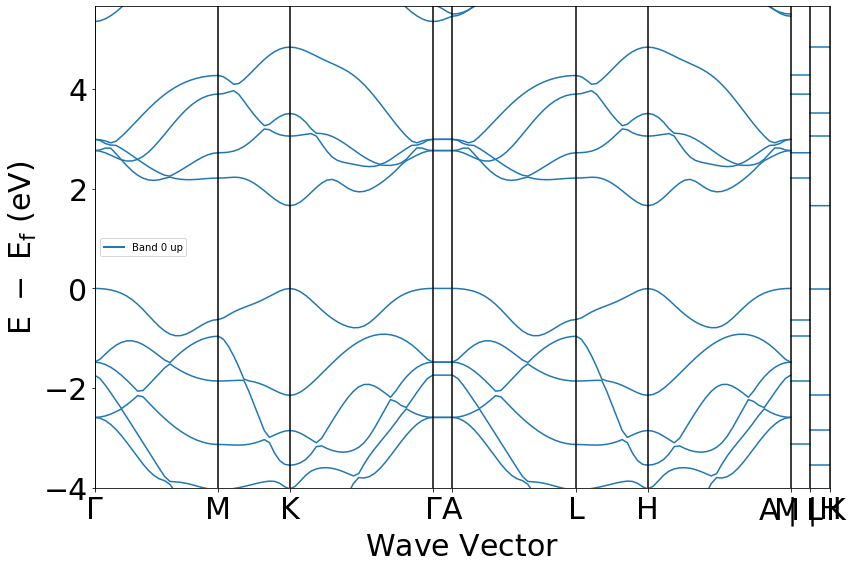

In [185]:
#Plot de la structure de bandes

plotter = BSPlotter(bs)
plotter.get_plot().show()



In [186]:
#Band Gap
bandgap = bs.get_band_gap()


print("La largeur du gap est de :",bandgap['energy'],"eV")

print("le vecteur d'onde se déplace à ce moment la va dans la direction :",bandgap['transition'])

if(bandgap['direct'] == True):
    print("La bande interdite est directe")
else:
    print("La bande interdite est indirecte")

La largeur du gap est de : 1.6605999999999999 eV
le vecteur d'onde se déplace à ce moment la va dans la direction : \Gamma-H
La bande interdite est indirecte


# Calcul des directions de dispersion max et min


Pour calculer les directions de dispersion pour les bandes de valence et de conduction il faut déterminer les distance entre chaque intervalle des abscisses du graphes de structure éléctronique de bande.


In [187]:
bsplot = BSPlotter(bs)
#Data du graphe de structure éléctronique de bande
data = bsplot.bs_plot_data()
ticks = data.get('ticks')
distance = ticks.get('distance')
dist_for_m = data.get('distances')

distances = []
for i in range(15):
    dist = distance[i+1]-distance[i]
    if dist not in distances :
        if dist != 0:
            distances.append(dist)
            
#Evolution de la distance
devol = []
sumdist = 0
for i,j in enumerate(distances):
    sumdist += j
    devol.append(sumdist)
            

            
print("Les distances entre intervalles sont :", distances)



Les distances entre intervalles sont : [1.1370657197994232, 0.6564852762598774, 1.3129703022830594, 0.18014233741248953, 1.137065719799426, 0.656485276259879, 1.3129703022830679, 0.18014233741249086]


Calcul des différences d'énergie et des pentes pour chaque intervalle


In [188]:
energie = data['energy']


diff_E_conduct = []
slope_conduct = []
diff_E_valence = []
slope_valence = []

#Indice de la dernière bande de valence
ind_val = bs.get_vbm()['band_index'].values() #Indice 11

#Indice de la dernière bande de conduction
ind_cond = bs.get_cbm()['band_index'].values() #Indice 12

#Calcul des différences d'énergie pour la bande de conduction
for band in range(len(distances)):
    a = energie['1'][band][:][12]
    diff_E_conduct.append(a[-1]-a[0])
    
print("La différence d'énergie pour chaque intervalle pour la bande de conduction est :",diff_E_conduct)

#Calcul des différences d'énergie pour la bande de valence
for band in range(len(distances)):
    a = energie['1'][band][:][11]
    diff_E_valence.append(a[-1]-a[0])

print("La différence d'énergie pour chaque intervalle pour la bande de valence est :",diff_E_valence)


#Calcul des pentes pour les deux bandes
for i in range(len(distances)):
    slope_conduct.append(abs(diff_E_conduct[i]/distances[i]))
    slope_valence.append(abs(diff_E_valence[i]/distances[i]))

print("Les pentes pour les intervalles sont :")
print("Pour la bande de conduction :", slope_conduct)
print("Pour la bande de conduction :", slope_valence)

#Calcul des min et des max pour les deux bandes
min_slope_C = min(slope_conduct)
max_slope_C = max(slope_conduct)
min_slope_V = min(slope_valence)
max_slope_V = max(slope_valence)

#Index des Max et min
i_max_C = 0; i_max_V = 0; i_min_C = 0; i_min_V = 0;

for i,j in enumerate(slope_conduct):
    if (j == max_slope_C):
        i_max_C = i
    if (j == min_slope_C):
        i_min_C = i
        
for i,j in enumerate(slope_valence):
    if (j == max_slope_V):
        i_max_V = i
    if (j == min_slope_V):
        i_min_V = i

print("Les pentes maximales sont :")
print("Pour la bande de conduction :", max_slope_C, "(index :", i_max_C, ")")
print("Pour la bande de valence :", max_slope_V, "(index :", i_max_V,")")

print("Les pentes minimales sont :")
print("Pour la bande de conduction :", min_slope_C, "(index :", i_min_C,")")
print("Pour la bande de valence :", min_slope_V, "(index :", i_min_V,")")



La différence d'énergie pour chaque intervalle pour la bande de conduction est : [-0.5522999999999998, -0.5539000000000001, 1.1061999999999999, 0.0, -0.5522999999999998, -0.554, 1.1062999999999998, 0.0]
La différence d'énergie pour chaque intervalle pour la bande de valence est : [-0.6241000000000001, 0.6214999999999999, 0.0026000000000001577, 0.0, -0.6241000000000001, 0.6214999999999999, 0.0026000000000001577, 0.0]
Les pentes pour les intervalles sont :
Pour la bande de conduction : [0.485723903537805, 0.8437356023514718, 0.8425171521979462, 0.0, 0.48572390353780376, 0.843887928692389, 0.8425933153829162, 0.0]
Pour la bande de conduction : [0.5488688904543622, 0.9467082088128537, 0.0019802428093606884, 0.0, 0.5488688904543608, 0.9467082088128514, 0.0019802428093606754, 0.0]
Les pentes maximales sont :
Pour la bande de conduction : 0.843887928692389 (index : 5 )
Pour la bande de valence : 0.9467082088128537 (index : 1 )
Les pentes minimales sont :
Pour la bande de conduction : 0.0 (ind

On va maintenant afficher le graphique avec les flèches des directions avec le plus ou le moins de dispersion pour les bandes de valences et de conduction

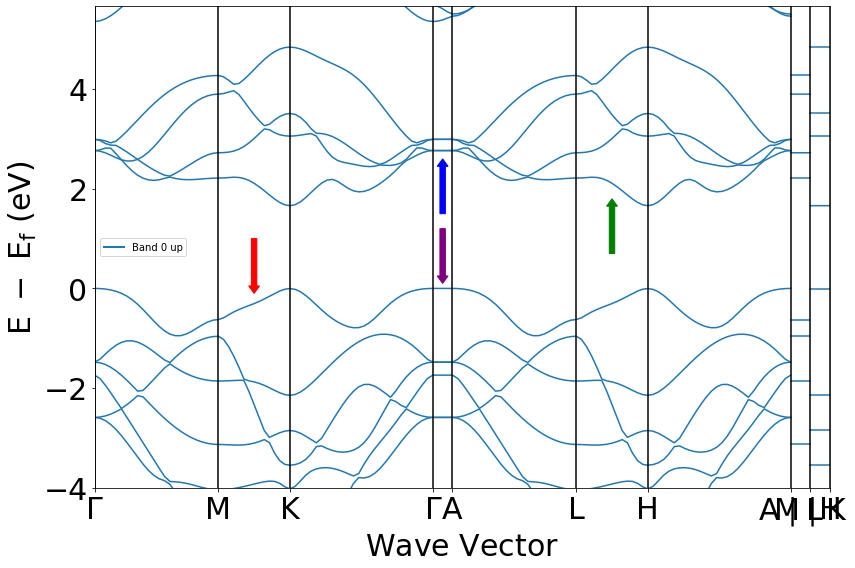

In [190]:
bsplot.get_plot()



#Conduction 
dist_cond_max = (devol[i_max_C] + devol[i_max_C-1])/2
arrow_cond_max = plt.arrow(dist_cond_max,0.7,0,0.95,color ='green',width = 0.05,head_width = 0.1)

dist_cond_min = (devol[3] + devol[2])/2
arrow_cond_min = plt.arrow(dist_cond_min,1.5,0,0.95,color ='blue',width = 0.05,head_width = 0.1)

#Valence 
dist_val_max = (devol[i_max_V] + devol[i_max_V-1])/2
arrow_val_max = plt.arrow(dist_val_max,1,0,-0.95,color ='red',width = 0.05,head_width = 0.1)

dist_val_min = (devol[3] + devol[2])/2
arrow_val_min = plt.arrow(dist_val_min,1.2,0,-0.95,color ='purple',width = 0.05,head_width = 0.1)



On voit donc bien ici les fléches rouge et verte indiquant respectivement l'emplacement des pentes maximales de la bande de valence et de la bande de conduction.
On peut voir que les minimums des deux bandes se situe au même endroit et sont caractérisé par l'aplatissement de la courbe 

# Calcul de la masse effective 


Pour calculer la masse effective m* avec l'hypothèse que la dispersion est parabolique ainsi que la formule de la masse effective faisant intervenir h barre ainsi que la dérivée seconde de epsilon il faut considérer un certain système d'équation dont je n'ai pas trouver la nature par faute d'incompréhension .